# 1D J1J2J3 model: Inference notebook (2nd set of experiments)

In the 2nd set of VMC experiments, only 2 cases are of interest: $(J_2, J_3) = (0.2, 0.5)$ and $(J_2, J_3) = (0.5, 0.2)$. Only 1 variant of Euclidean GRU ansatz was used: eGRU-60-s50, while various hyperbolic GRU ansatzes with different $ 53\leq d_h < 60$ were used, and the best one chosen to compare against Euclidean GRU. In this inference notebook, only the best results are included. 
- $(J_2, J_3) = (0.2, 0.5)$: Best hyperbolic GRU variant is hGRU-55-s50
- $(J_2, J_3) = (0.5, 0.2)$: Best hyperbolic GRU variant is hGRU-57-s50

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../utility')
from j1j2j3_hyprnn_train_loop import *

2025-06-09 13:17:32.213652: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


In [2]:
def define_load_test(wf, weight_link):
    test_samples_before = wf.sample(50,2)
    #print(test_samples_before)
    test_gs_before = J1J2J3_local_energies(wf, N, J1, J2, J3, Bz, 50, test_samples_before, True)
    
    gs_mean_b = np.mean(test_gs_before)
    gs_var_b = np.var(test_gs_before)
    print(f'Before loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_b}, var E = {gs_var_b}')
    print('====================================================================')
    wf.model.load_weights(weight_link)
    test_samples_after = wf.sample(50,2)
    test_gs_after =  J1J2J3_local_energies(wf, N, J1, J2, J3, Bz, 50, test_samples_after, True)
    #print(test_samples_after)
    gs_mean_a = np.mean(test_gs_after)
    gs_var_a = np.var(test_gs_after)
    
    wf.model.summary()
    print('====================================================================')
    print(f'After loading weights, the ground state energy mean and variance are:')
    print(f'Mean E = {gs_mean_a}, var E = {gs_var_a}')

In [3]:
N=30
Bz=+0.0*np.ones(N)

# J2 =0.2, J3=0.5

In [4]:
J1_ = 1.0
J2_ = 0.2
J3_ = 0.5
E_02_05 = -14.640825798

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

## EuclGRU: 60 units

In [5]:
#EUCLGRU: 60 UNITS
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 60, seed = 151)
wl_gru='results_2/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_60_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

Before loading weights, the ground state energy mean and variance are:
Mean E = (12.351109504699707-0.12067633867263794j), var E = 2.539820432662964


Model: "wf_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru (EuclGRU)              │ ?                      │        11,340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           122 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           122 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,584 (45.25 KB)

 Trainable params: 11,584 (45.25 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-14.682839393615723-0.0037988710682839155j), var E = 1.000545620918274


## HypGRU: 55 units

In [6]:
#HYPGRU: 55 UNITS
wf_hgru2 = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 55, seed=151)
wl_hgru2 = 'results_2/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_55_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru2,wl_hgru2)

Before loading weights, the ground state energy mean and variance are:
Mean E = (9.79368782043457-0.02814209647476673j), var E = 3.672847032546997


Model: "wf_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru (HypGRU)                │ ?                      │         9,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,794 (38.26 KB)

 Trainable params: 9,794 (38.26 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-14.424346923828125+0.06966359168291092j), var E = 0.6399059295654297


# J2 =0.5, J3=0.2

In [7]:
J1_ = 1.0
J2_ = 0.5
J3_ = 0.2
E_05_02 =-11.528738924

J1=+J1_*np.ones(N) # nearest neighbours couplings
J2=+J2_*np.ones(N) # next-nearest neighbours couplings
J3=+J3_*np.ones(N) # next-next-nearest neighbours couplings

## EuclGRU: 60 units

In [8]:
#EUCLGRU: 60 UNITS
wf_gru = rnn_eucl_wf(N, 'EuclGRU', 60, seed = 111)
wl_gru='results_2/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_60_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_gru,wl_gru)

Before loading weights, the ground state energy mean and variance are:
Mean E = (11.963343620300293-0.16313239932060242j), var E = 1.9271807670593262


Model: "wf_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ eucl_gru_1 (EuclGRU)            │ ?                      │        11,340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           122 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           122 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,584 (45.25 KB)

 Trainable params: 11,584 (45.25 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-11.206084251403809+0.002547144191339612j), var E = 0.40327662229537964


## HypGRU 57 units

In [9]:
#HYPGRU: 57 UNITS
wf_hgru2 = rnn_hyp_wf(N,'HypGRU', 'hyp', 'id', 57, seed=111)
wl_hgru2 = 'results_2/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_57_id_hyp_ns=50_MsTrue_checkpoint.weights.h5'
define_load_test(wf_hgru2,wl_hgru2)

Before loading weights, the ground state energy mean and variance are:
Mean E = (11.524147033691406-0.0071902526542544365j), var E = 1.4831817150115967


Model: "wf_model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hyp_gru_1 (HypGRU)              │ ?                      │        10,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_ampl (Dense)           │ (50, 2)                │           116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ wf_dense_phase (Dense)          │ (49, 2)                │           116 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,492 (40.98 KB)

 Trainable params: 10,492 (40.98 KB)

 Non-trainable params: 0 (0.00 B)

After loading weights, the ground state energy mean and variance are:
Mean E = (-11.307036399841309+0.012432800605893135j), var E = 0.06492504477500916


# Convergence curves

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
color_l = ['cyan', 'green', 'orange', 'cyan', 'purple']
def plot_res_meanE(ax, Ee, e_list, e_names, j23, frange, legend_loc):
    for i in range(len(e_list)):
        ax.plot(np.arange(len(e_list[i])), np.real(e_list[i]),color = color_l[i], label = e_names[i])
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",fontsize = 15)
       
    ax2 = inset_axes(parent_axes=ax,width="45%",height="35%",borderpad=1)    
    for i in range(len(e_list)):
        ax2.plot(np.arange(len(e_list[i])), e_list[i],color = color_l[i], label = e_names[i])
    ax2.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)
    
color_l = ['cyan', 'green', 'orange', 'cyan', 'purple']
def plot_res_var(ax, v_list, e_names, j23, frange, legend_loc):
    for i in range(len(v_list)):
        ax.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylim(-5, 45)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",
              fontsize = 15)
    ax2 = inset_axes(parent_axes=ax,width="45%",height="35%",borderpad=1 )
    for i in range(len(v_list)):
        ax2.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    ax2.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

In [14]:
fname = 'results_2'
###################################### (J2, J3) = (0.2, 0.5) #######################################
mE02_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_60_ns50_MsTrue_meanE.npy')
vE02_05 = np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_60_ns=50_MsTrue_varE.npy')

mEh02_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_55_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_05 =np.load(f'{fname}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_55_id_hyp_ns=50_MsTrue_varE.npy')

###################################### (J2, J3) = (0.5, 0.2) #######################################
mE05_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_60_ns50_MsTrue_meanE.npy')
vE05_02 = np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_60_ns=50_MsTrue_varE.npy')

mEh05_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_57_id_hyp_ns50_MsTrue_meanE.npy')
vEh05_02 =np.load(f'{fname}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_57_id_hyp_ns=50_MsTrue_varE.npy')

In [15]:
E_02_05 = -14.640825798
E_05_02 = -11.528738924

/Users/hldao/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/hldao/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/_m/f5wfg_q565n3zzgb4_nnnz4m0000gn/T/ipykernel_40648/2967456560.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1D-J1-J2-J3-N=30_add.png')
/Users/hldao/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


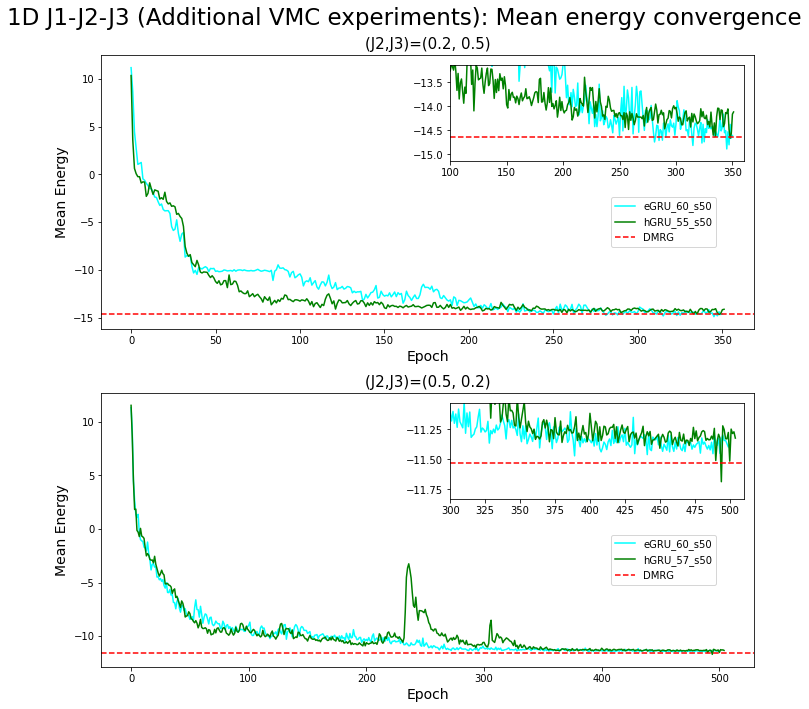

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), tight_layout=True)
e_list02_05 = [mE02_05, mEh02_05]
e_names1 = ['eGRU_60_s50',  'hGRU_55_s50']
e_list05_02 = [mE05_02[:501], mEh05_02]
e_names2 = ['eGRU_60_s50',  'hGRU_57_s50']

plot_res_meanE(ax[0], E_02_05, e_list02_05, e_names1, [0.2,0.5], [100,360, E_02_05-0.5, E_02_05+1.5], (0.15, 0.3, 0.8, 0.2))
plot_res_meanE(ax[1], E_05_02, e_list05_02, e_names2, [0.5, 0.2], [300,510,E_05_02-0.3, E_05_02+0.5], (0.15, 0.3, 0.8, 0.2))

plt.suptitle('1D J1-J2-J3 (Additional VMC experiments): Mean energy convergence', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30_add.png')

/var/folders/_m/f5wfg_q565n3zzgb4_nnnz4m0000gn/T/ipykernel_40648/3545102391.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1D-J1-J2-J3-N=30-var_add.png')


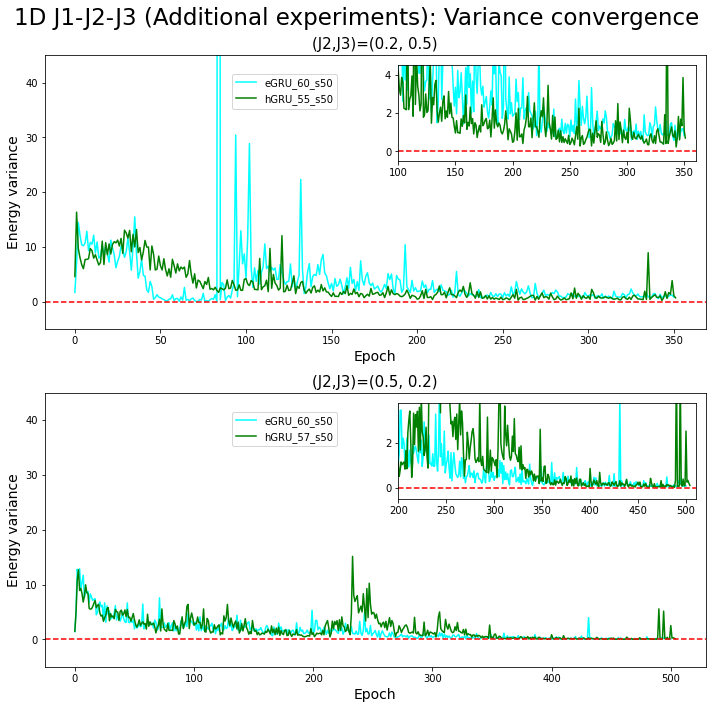

In [17]:
fig, ax = plt.subplots(2,1, figsize=(10, 10), tight_layout=True)

e_list02_05 = [vE02_05, vEh02_05]
e_list05_02 = [vE05_02[:501], vEh05_02]

plot_res_var(ax[0],  e_list02_05, e_names1, [0.2,0.5], [100,360, -0.5, 4.5], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[1], e_list05_02, e_names2, [0.5, 0.2], [200,510,-0.5, 3.8], (0.15, 0.75, 0.3, 0.2))

plt.suptitle('1D J1-J2-J3 (Additional experiments): Variance convergence', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30-var_add.png')